Demo of an epidemic on a network

In [15]:
import sys
sys.path.append('.')
sys.path.append('..')
import matplotlib.pyplot as plt
import networkx as nx
from SellkeSimulation.Simulation import complex_epidemic_simulation

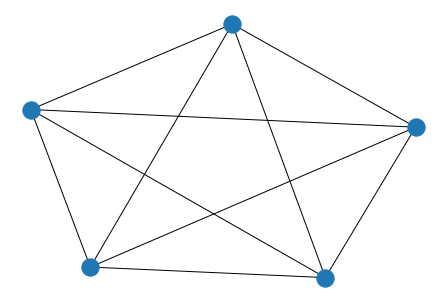

In [16]:
G = nx.complete_graph(5)
nx.draw(G)

We will be simulating an epidemic on the above graph, although for a much larger population size. There exists some results on how far the epidemic will spread in the complete population, so we will use Monte Carlo simulation to check that the simulation works as intended.

In [17]:
my_network_epidemic = complex_epidemic_simulation(G, beta = 0.008, I_parameters = 1.5, initial_infected = [1], time_increment = 0.1,
                                                  max_iterations = 1000)
my_network_epidemic.iterate_epidemic()
print(f"The final size was of the epidemic was {my_network_epidemic.final_size}")
print(f"Time Simulated until = {my_network_epidemic.time}")
print(my_network_epidemic.stop_reason)

The final size was of the epidemic was 1
Time Simulated until = 0.2
The epidemic died out at time = 0.2 (2 iterations)


In [19]:
G = nx.complete_graph(200)
final_size = []
iterations_taken = []
iterations = 100
for _ in range(iterations):

    my_network_epidemic = complex_epidemic_simulation(G,
                                                      beta = 0.008,
                                                      I_parameters = 1.5,
                                                      initial_infected = [0], 
                                                      time_increment = 0.1,
                                                      max_iterations = 1000)
    my_network_epidemic.iterate_epidemic()
    final_size.append(my_network_epidemic.final_size)
    iterations_taken.append(my_network_epidemic.time)
    
    sys.stdout.flush()
    print('Percentage Complete:', round(_/iterations*100), '%' , end='\r')

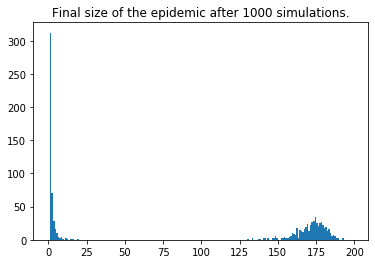

In [5]:
plt.hist(final_size, bins = range(200))
plt.title(f"Final size of the epidemic after {iterations} simulations.")
plt.show()

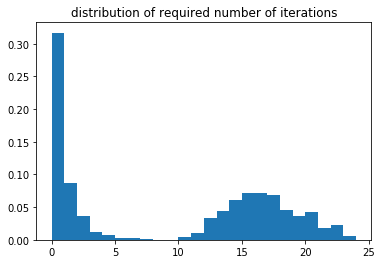

In [6]:
plt.hist(iterations_taken, bins = range(25), density = True)
plt.title(f"distribution of required number of iterations")
plt.show()

Now lets do some more interesting networks and see if we can get results that agree with.

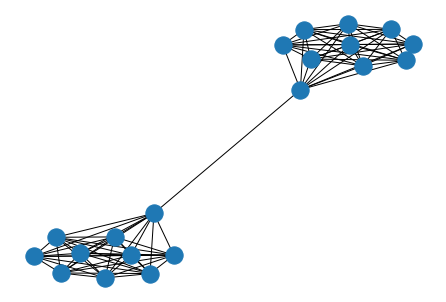

In [7]:
G = nx.barbell_graph(10,0)
nx.draw(G)

In [8]:
G = nx.barbell_graph(100,0)

In [61]:
final_size = []
iterations_taken = []
iterations = 1000
for _ in range(iterations):
    my_network_epidemic = complex_epidemic_simulation(G,
                                                      beta = 0.6,
                                                      I_parameters = 2, 
                                                      initial_infected = 10,
                                                      time_increment = 0.1,
                                                      max_iterations = 1000)
    my_network_epidemic.iterate_epidemic()
    final_size.append(my_network_epidemic.final_size)
    iterations_taken.append(my_network_epidemic.time)
    
    sys.stdout.flush()
    print('Percentage Complete:', round(_/iterations*100), '%' , end='\r')

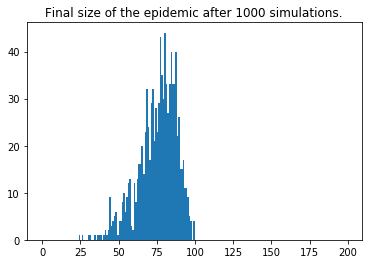

In [60]:
plt.hist(final_size, bins = range(200))
plt.title(f"Final size of the epidemic after {iterations} simulations.")
plt.show()

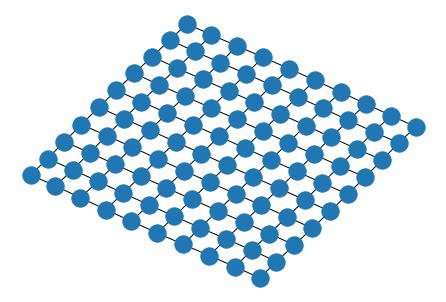

In [42]:
G = nx.grid_2d_graph(10,10)
nx.draw_kamada_kawai(G)

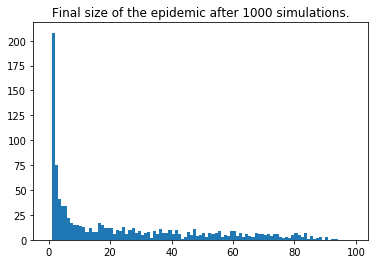

In [62]:
G = nx.grid_2d_graph(10,10)
final_size = []
iterations_taken = []
iterations = 1000
for _ in range(iterations):
    my_network_epidemic = complex_epidemic_simulation(G,
                                                      beta = 0.7,
                                                      I_parameters = 1.5,
                                                      initial_infected = 1,
                                                      time_increment = 0.1,
                                                      max_iterations = 1000)
    my_network_epidemic.iterate_epidemic()
    final_size.append(my_network_epidemic.final_size)
    iterations_taken.append(my_network_epidemic.time)
    
    sys.stdout.flush()
    print('Percentage Complete:', round(_/iterations*100), '%' , end='\r')
    
plt.hist(final_size, bins = range(100))
plt.title(f"Final size of the epidemic after {iterations} simulations.")
plt.show()

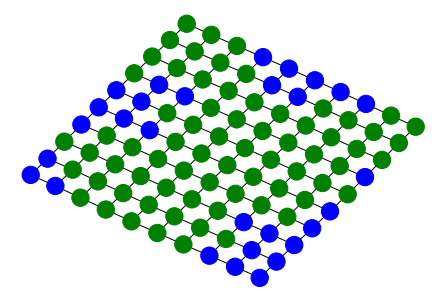

In [64]:
my_network_epidemic = complex_epidemic_simulation(G,
                                                  beta = 0.7,
                                                  I_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 1000)
my_network_epidemic.iterate_epidemic()
color_map = []
for node in G:
    if node in my_network_epidemic.recovered_nodes:
        color_map.append('green')
    else: color_map.append('blue')      
nx.draw_kamada_kawai(G,node_color = color_map,with_labels = False)
plt.show()